# Decision Trees

## Import Libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# teste

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

## Get and show the Data

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

Retrieve the column labels from the dataset.

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Revealing Structure, Data Types, non-null counts, and memory usage.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Method for counting unique values in each column

In [5]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## Data Transformation

Eliminating Columns: removing the <em>Z_CostContact</em> and <em>Z_Revenue<em/> columns from the DataFrame

In [6]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


Cleaning Rows: eliminates rows containing any missing (NaN) values, ensuring a DataFrame without such incomplete data

In [7]:
data = data.dropna()

Using pd.to_datetime(), the <em>Dt_Customer</em> column, originally stored as an object, is converted to a datetime format. The specified format '%d-%m-%Y' indicates the day-month-year sequence within the <em>Dt_Customer</em> column, reformatting it to a standardized date representation

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

These operations transform the 'data' DataFrame by altering, creating, and refining columns and their contents for better analysis and clarity

In [9]:
data["Age"] = 2023 - data["Year_Birth"]
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"1", "Together":"1","Absurd":"0", "Widow":"0", "YOLO":"0", "Divorced":"0", "Single":"0", "Alone":"0"})
data["Marital_Status"] = data["Marital_Status"].astype('int64')
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumDealsPurchases": "DealsPurch", "NumWebPurchases": "WebPurch", "NumCatalogPurchases" : "CatalogPurch", "NumStorePurchases": "StorePurch", "NumWebVisitsMonth": "WebVisits"})
to_drop = ["Year_Birth","Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data = data.drop(to_drop, axis=1)

Before we transformed the 'data' DataFrame, we had 28 columns with some columns that we would not precisely need to this process, so we rearranged it with the cell above and got
the following info from the DataFrame. We created a column called <em>Age</em>, where we subtracted the year 2023 with the data["Year_Birth"], created another column called <em>Spent</em>  by summing up expenditure columns (<em>MntWines</em>, <em>MntFruits</em>, <em>MntMeatProducts</em>, <em>MntFishProducts</em>, <em>MntSweetProducts</em>, <em>MntGoldProds</em>), representing the overall spent amount, replaced specific categories and converting them into integers (0 or 1) on the column <em>Marital_Status</em>, renamed some columns and eliminated some unwanted columns. With all these changes we got a better understanding of the contents, with a total of 22 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

Here we generate descriptive statistics of the numerical columns in the DataFrame 'data', including count, mean, standard deviation, minimum, maximum and quartile values. This summary helps in understanding the distribution and characteristics of the numerical data

In [11]:
data.describe()

,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,0.645307,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,54.179603,0.947202,607.075361
min,0.000000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000
25%,2814.750000,0.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,46.000000,0.000000,69.000000
50%,5458.500000,1.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,53.000000,1.000000,396.500000
75%,8421.750000,1.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,64.000000,1.000000,1048.000000
max,11191.000000,1.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,130.000000,3.000000,2525.000000
std,3249.376275,0.478528,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,0.749062,602.900476


We create a copy of the original DataFrame 'data' named 'data1', ensuring that any changes made to 'data1' won't affect the original 'data' DataFrame

In [12]:
data1 = data.copy()

## Feature and Target Data Separation

In case we did not treat the data previously, we would have to create a DataFrame 'X', by excluding the columns <em>Marital_Status</em>, <em>Education</em>, <em>DT_Customer</em> from 'data1'. This DataFrame contains the features for modeling

We also prepare the target variable 'y' by extracting the <em>Marital_Status</em> column from the original 'data' DataFrame, converting it into a DataFrame format. This will be the target for the model

These steps separate the data for predictive modeling or analysis: 'X' represents the features, while 'y' represents the target variable to be predicted or analyzed


In [13]:
X = data1.drop(['Marital_Status', 'Education', 'Dt_Customer'], axis=1)
y = data['Marital_Status'].to_frame()

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

Displaying the contents of the DataFrame 'X'

In [15]:
X

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids,Spent
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,66,0,1617
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,69,2,27
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,58,0,776
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,39,1,53
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,42,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,56,1,1341
2236,4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,77,3,444
2237,7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,42,0,1241
2238,8235,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,67,1,843


Displaying the contents of the DataFrame 'y'

In [16]:
y

,Marital_Status
0,0
1,0
2,1
3,1
4,1
...,...
2235,1
2236,1
2237,0
2238,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [32]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))

The shape of X (2216, 19). X_train has shape (1662, 19) while X_test has shape (554, 19)


In [33]:
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of y (2216, 1). y_train has shape (1662, 1) while y_test has shape (554, 1)


In [34]:
clf = DecisionTreeClassifier(random_state=2023)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [36]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [37]:
confusion_matrix(y_test, predictions)

array([[ 82, 120],
       [110, 242]], dtype=int64)

In [38]:
accuracy_score(y_test, predictions)

0.5848375451263538

In [39]:
precision_score(y_test, predictions)

0.6685082872928176

In [40]:
recall_score(y_test, predictions)

0.6875

In [41]:
roc_auc_score(y_test, predictions)

0.5467202970297029

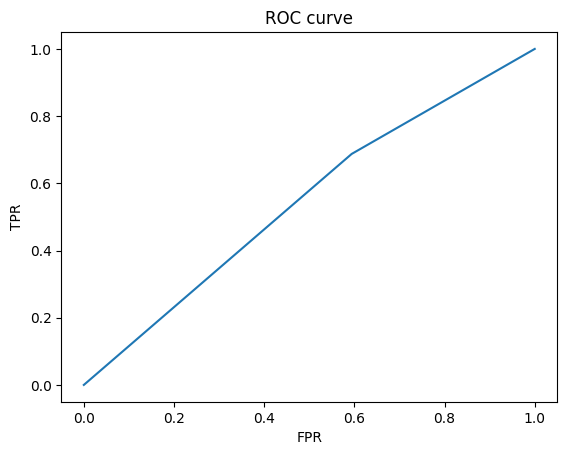

In [42]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [29]:
f1_score(y_test, predictions)

0.6795313576843557

In [30]:
fbeta_score(y_test, predictions, beta=0.5)

0.6770118099423236

### ---------------------------------------------------
# Regressão com dinheiro Gasto

In [43]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
data2 = data.copy()
X = data2.drop(['Marital_Status', 'Education', 'Dt_Customer', 'Spent'], axis=1)
y = data['Spent'].to_frame()

In [45]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Education       2216 non-null   object        
 2   Marital_Status  2216 non-null   int64         
 3   Income          2216 non-null   float64       
 4   Kidhome         2216 non-null   int64         
 5   Teenhome        2216 non-null   int64         
 6   Dt_Customer     2216 non-null   datetime64[ns]
 7   Recency         2216 non-null   int64         
 8   Wines           2216 non-null   int64         
 9   Fruits          2216 non-null   int64         
 10  Meat            2216 non-null   int64         
 11  Fish            2216 non-null   int64         
 12  Sweets          2216 non-null   int64         
 13  Gold            2216 non-null   int64         
 14  DealsPurch      2216 non-null   int64         
 15  WebPurch 

In [46]:
X

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealsPurch,WebPurch,CatalogPurch,StorePurch,WebVisits,Age,Kids
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,66,0
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,69,2
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,58,0
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,39,1
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,56,1
2236,4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,77,3
2237,7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,42,0
2238,8235,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,67,1


In [47]:
y

,Spent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

In [49]:
import time

def analise_model(model, y_train_analise=y_train): 
    start_time = time.time()
    model.fit(X_train, y_train_analise)
    predictions = model.predict(X_test)
    print("time - {}".format(time.time()-start_time))
    predictions  = predictions.reshape(len(predictions),1 )
    # Métricas
    print(model)
    #print("Parâmetros:")
    #print(model.get_params())
    print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", mean_squared_error(y_test, predictions, squared=True))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
   # sns.displot(y_test-predictions)
   # plt.show() 
    ax = plt.axes()
    ax.plot([0, 500, 1000, 2000, 2500, 3000], [0, 500, 1000, 2000, 2500, 3000], 'r')
    plt.scatter(y_test,predictions)
    plt.show()
    return predictions

time - 0.0530552864074707
DecisionTreeRegressor(random_state=2024)
Mean Absolute Error:  59.66606498194946
Mean Squared Error:  10968.18953068592
RMSE:  104.72912455800402


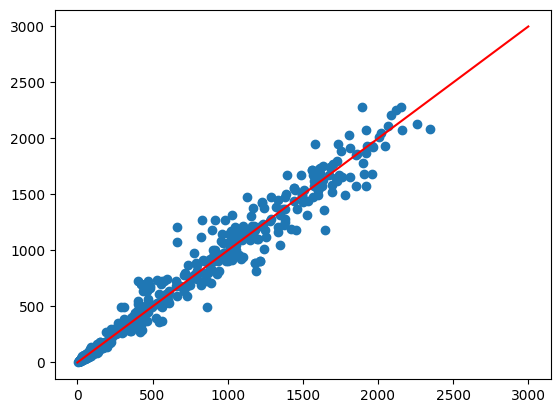

time - 0.43503451347351074
RandomForestRegressor(max_depth=10, n_estimators=20, random_state=2024)
Mean Absolute Error:  33.75174746052473
Mean Squared Error:  3249.692617191025
RMSE:  57.00607526563309


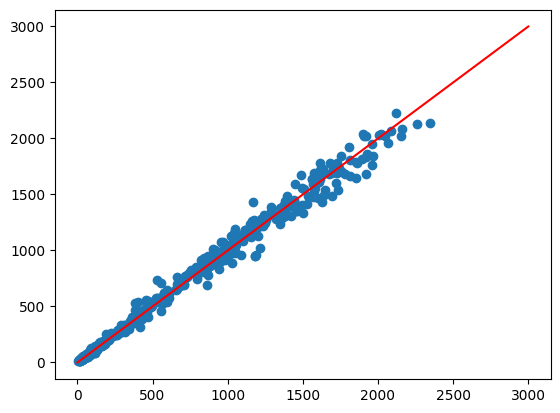

time - 0.6719655990600586
GradientBoostingRegressor(random_state=2024)
Mean Absolute Error:  26.949907129257323
Mean Squared Error:  1583.0128107861642
RMSE:  39.78709352021286


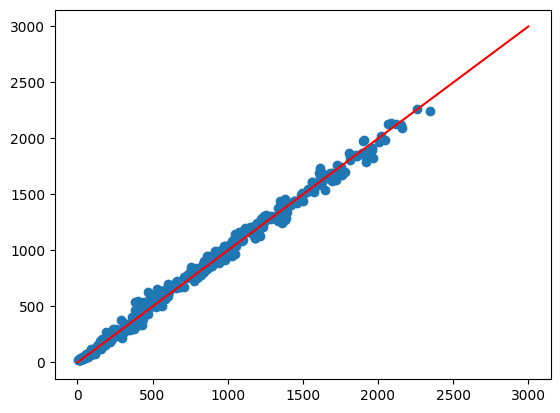

array([[  71.13689136],
       [ 655.1213168 ],
       [ 848.82230933],
       [ 219.25347879],
       [ 216.91482519],
       [  51.62799335],
       [1857.99262894],
       [ 574.0687305 ],
       [  70.21075005],
       [  60.97382313],
       [1810.28322761],
       [ 166.03054973],
       [1712.59678169],
       [ 301.34349024],
       [2139.7721721 ],
       [  57.16375032],
       [  29.15293241],
       [  56.98914439],
       [  48.56068548],
       [  60.87303706],
       [1080.27090488],
       [ 428.20075985],
       [ 625.758877  ],
       [  72.34851138],
       [  65.78000071],
       [1107.50553358],
       [  44.20250035],
       [ 407.38130552],
       [ 180.45920777],
       [  58.42368021],
       [ 331.48016578],
       [ 980.17152295],
       [  50.14350841],
       [  50.97943801],
       [ 748.01971633],
       [ 832.36683629],
       [1229.82507505],
       [ 762.63860069],
       [  85.19186257],
       [  85.27533285],
       [ 407.38130552],
       [ 967.065

In [50]:
dtr = DecisionTreeRegressor(random_state=2024)
rfr = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error', random_state=2024)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)

analise_model(dtr)
analise_model(rfr, y_train.values.ravel())
analise_model(gbr)